In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import  datasets, metrics, tree
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML_homework/task1/bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['Activity'].unique()

array([1, 0])

In [ ]:
df_log_reg = df.drop(['Activity'], axis=1)
scaler = StandardScaler()
X=scaler.fit_transform(df_log_reg)

In [ ]:
X

array([[-0.96211163, -0.90156647,  0.40633482, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 3.62247289,  0.13089854, -0.23138983, ..., -0.10894694,
         6.95379487, -0.10641338],
       [-0.545748  , -1.06108805, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       ...,
       [ 1.53857083, -0.67902883, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 0.2882296 ,  1.63642996, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 0.70501001, -0.55254143, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338]])

In [ ]:
y=df['Activity'].values
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# **small decision tree**

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 2)
clf.fit(X_train, y_train)
y_out = clf.predict(X_test)
y_out_proba = clf.predict_proba(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_out)
precision = metrics.precision_score(y_test,y_out)
recall = metrics.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = metrics.f1_score(y_test,y_out)
log_loss = log_loss(y_test, y_out)

print('###########################')
print('### small decision tree ###')
print('###########################')
print('accuracy', round(accuracy, 5))
print('precision', round(precision, 5))
print('recall', round(recall, 5))
print('roc_auc', round(roc_auc, 5))
print('F1-score', round(f1_score, 5))
print('log-Loss', round(log_loss, 5))

###########################
### small decision tree ###
###########################
accuracy 0.75586
precision 0.79087
recall 0.77757
roc_auc 0.75102
F1-score 0.78417
log-Loss 8.79957


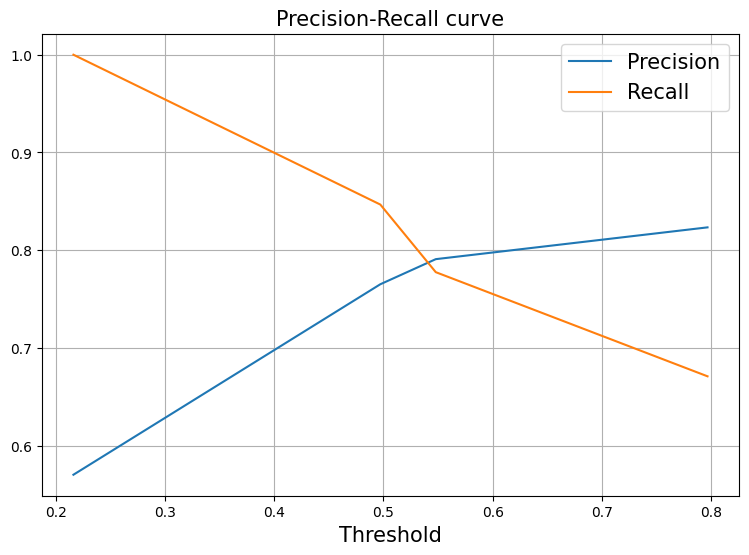

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

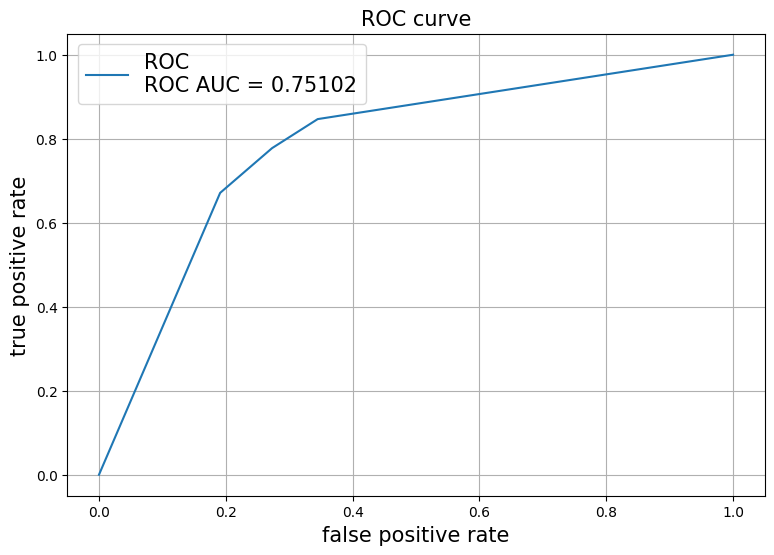

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc, 5)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

# **deep decision tree**

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 10)
clf.fit(X_train, y_train)
y_out = clf.predict(X_test)
y_out_proba = clf.predict_proba(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_out)
precision = metrics.precision_score(y_test,y_out)
recall = metrics.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = metrics.f1_score(y_test,y_out)
log_loss = log_loss(y_test, y_out)

print('##########################')
print('### deep decision tree ###')
print('##########################')
print('accuracy', round(accuracy, 5))
print('precision', round(precision, 5))
print('recall', round(recall, 5))
print('roc_auc', round(roc_auc, 5))
print('F1-score', round(f1_score, 5))
print('log-Loss', round(log_loss, 5))

##########################
### deep decision tree ###
##########################
accuracy 0.73454
precision 0.75719
recall 0.78692
roc_auc 0.72938
F1-score 0.77177
log-Loss 9.56809


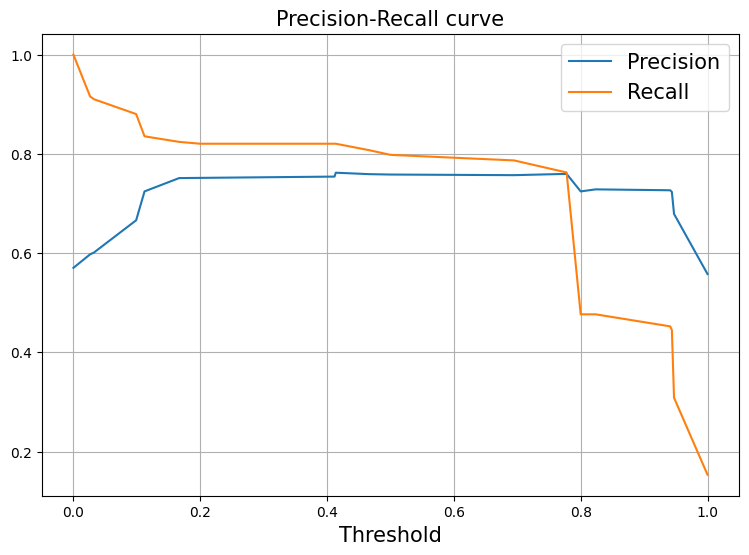

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

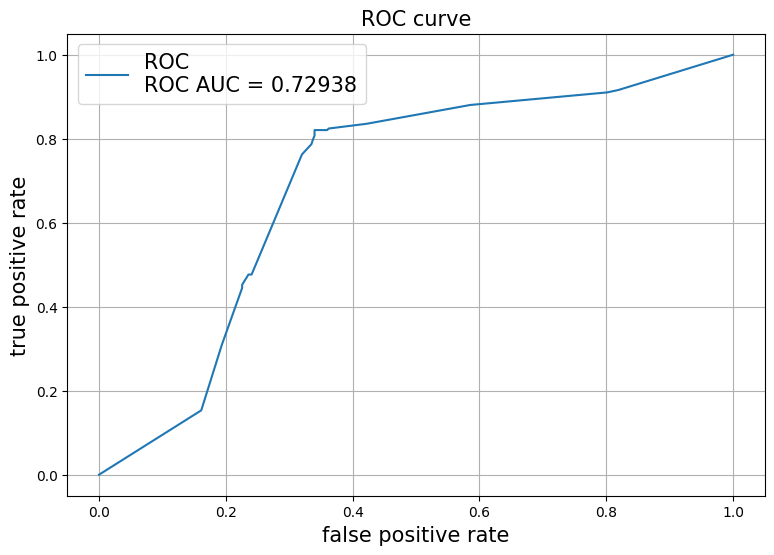

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc, 5)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

# **random forest on small trees**

In [ ]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rf_classifier_low_depth.fit(X_train, y_train)
y_out = rf_classifier_low_depth.predict(X_test)
y_out_proba = rf_classifier_low_depth.predict_proba(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_out)
precision = metrics.precision_score(y_test,y_out)
recall = metrics.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = metrics.f1_score(y_test,y_out)
log_loss = log_loss(y_test, y_out)

print('####################################')
print('### random forest on small trees ###')
print('####################################')
print('accuracy', round(accuracy, 5))
print('precision', round(precision, 5))
print('recall', round(recall, 5))
print('roc_auc', round(roc_auc, 5))
print('F1-score', round(f1_score, 5))
print('log-Loss', round(log_loss, 5))

####################################
### random forest on small trees ###
####################################
accuracy 0.70362
precision 0.71597
recall 0.79626
roc_auc 0.69909
F1-score 0.75398
log-Loss 10.68245


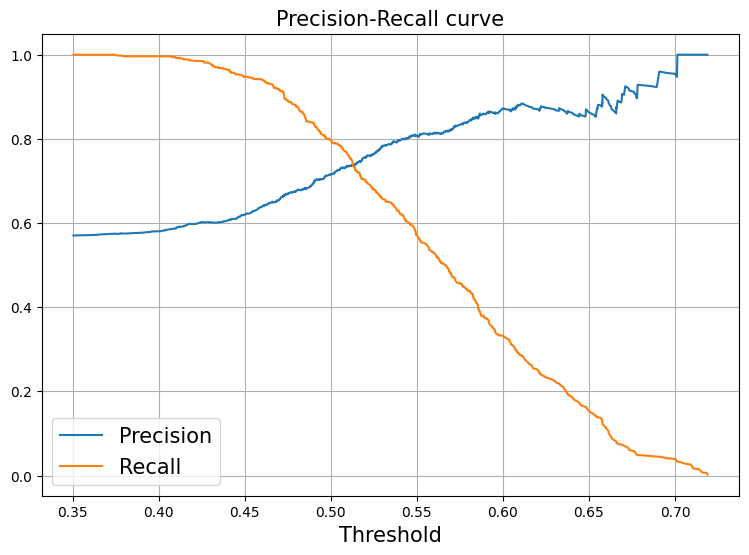

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

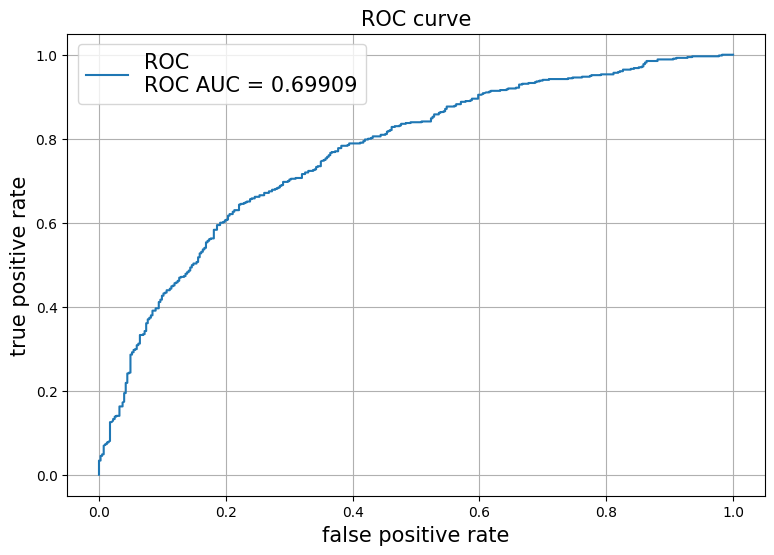

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc, 5)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

# **random forest on deep trees**

In [ ]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
rf_classifier_low_depth.fit(X_train, y_train)
y_out = rf_classifier_low_depth.predict(X_test)
y_out_proba = rf_classifier_low_depth.predict_proba(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_out)
precision = metrics.precision_score(y_test,y_out)
recall = metrics.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = metrics.f1_score(y_test,y_out)
log_loss = log_loss(y_test, y_out)

print('###################################')
print('### random forest on deep trees ###')
print('###################################')
print('accuracy', round(accuracy, 5))
print('precision', round(precision, 5))
print('recall', round(recall, 5))
print('roc_auc', round(roc_auc, 5))
print('F1-score', round(f1_score, 5))
print('log-Loss', round(log_loss, 5))

###################################
### random forest on deep trees ###
###################################
accuracy 0.78891
precision 0.82718
recall 0.79626
roc_auc 0.78475
F1-score 0.81143
log-Loss 7.60836


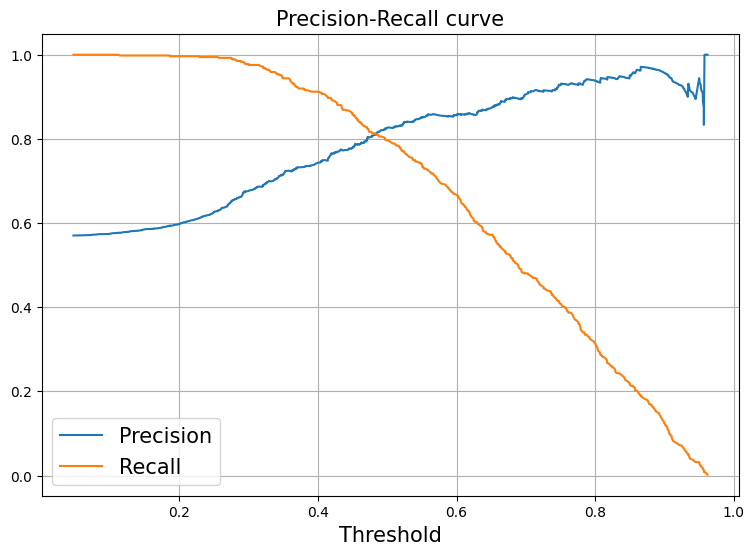

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

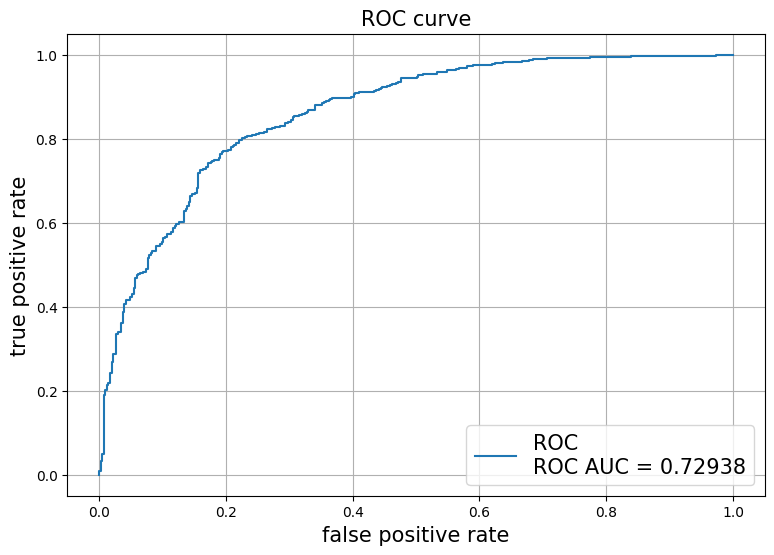

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc, 5)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

# **Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.**

In [ ]:
# decision tree
param = np.arange(1, 30)
accuracy_ = []
precision_ = []
recall_ = []
roc_auc_ = []
f1_score_ = []

for i in param:
  clf = tree.DecisionTreeClassifier(random_state=1, max_depth = i)
  clf.fit(X_train, y_train)
  y_out = clf.predict(X_test)
  y_out_proba = clf.predict_proba(X_test)
  accuracy_.append(metrics.accuracy_score(y_test, y_out))
  precision_.append(metrics.precision_score(y_test,y_out))
  recall_.append(metrics.recall_score(y_test,y_out))
  roc_auc_.append(roc_auc_score(y_out,y_test))
  f1_score_.append(metrics.f1_score(y_test,y_out))

In [ ]:
print('###########################')
print('### decision tree ###')
print('###########################')
param = list(param)
print('accuracy', round(max(accuracy_), 5), 'depth', param[accuracy_.index(max(accuracy_))])
print('precision', round(max(precision_), 5), 'depth', param[precision_.index(max(precision_))])
print('recall', round(max(recall_), 5), 'depth', param[recall_.index(max(recall_))])
print('roc_auc', round(max(roc_auc_), 5), 'depth', param[roc_auc_.index(max(roc_auc_))])
print('F1-score', round(max(f1_score_), 5), 'depth', param[f1_score_.index(max(f1_score_))])

###########################
### small decision tree ###
###########################
accuracy 0.76333 depth 4
precision 0.7981 depth 4
recall 0.82056 depth 7
roc_auc 0.75861 depth 4
F1-score 0.79487 depth 5


In [ ]:
# random forest

depth = np.arange(1, 2)
estimators = np.arange(91, 92)
min_samples_leaf = [1]
min_samples_split = [2]

accuracy_ = []
precision_ = []
recall_ = []
roc_auc_ = []
f1_score_ = []
log_loss_ = []

param = [[], [], [], []] # [0]-estimators, [1]-depth, [2]-min_samples_leaf, [3]-min_samples_split

for i in estimators:
  for j in depth:
      for k in min_samples_leaf:
        for g in min_samples_split:

          clf = RandomForestClassifier(n_estimators = i , max_depth = j, random_state=1, bootstrap = False, max_features = 'log2', min_samples_leaf = k, min_samples_split = g)
          clf.fit(X_train, y_train)
          y_out = clf.predict(X_test)
          y_out_proba = clf.predict_proba(X_test)
          accuracy_.append(metrics.accuracy_score(y_test, y_out))
          precision_.append(metrics.precision_score(y_test,y_out))
          recall_.append(metrics.recall_score(y_test,y_out))
          roc_auc_.append(roc_auc_score(y_out,y_test))
          f1_score_.append(metrics.f1_score(y_test,y_out))
          log_loss_.append(log_loss(y_test, y_out))
          param[0].append(i)
          param[1].append(j)
          param[2].append(k)
          param[3].append(g)

In [ ]:
print('###########################')
print('### random forest ###')
print('###########################')
estimators = list(estimators)
depth = list(depth)
print('accuracy', round(max(accuracy_), 5), 'estimators', param[0][accuracy_.index(max(accuracy_))], 'depth', param[1][accuracy_.index(max(accuracy_))])
print('precision', round(max(precision_), 5), 'estimators', param[0][precision_.index(max(precision_))], 'depth', param[1][precision_.index(max(precision_))])
a = recall_.index(max(recall_))
print('recall', round(max(recall_), 5), 'estimators', param[0][a], 'depth', param[1][a], 'min_samples_leaf', param[2][a], 'min_samples_split', param[3][a])
print('roc_auc', round(max(roc_auc_), 5), 'estimators', param[0][roc_auc_.index(max(roc_auc_))], 'depth', param[1][roc_auc_.index(max(roc_auc_))])
print('F1-score', round(max(f1_score_), 5), 'estimators', param[0][f1_score_.index(max(f1_score_))], 'depth', param[1][f1_score_.index(max(f1_score_))])
print('log_loss', log_loss_)

###########################
### random forest ###
###########################
accuracy 0.62473 estimators 91 depth 1
precision 0.60505 estimators 91 depth 1
recall 0.98505 estimators 91 depth 1 min_samples_leaf 1 min_samples_split 2
roc_auc 0.74282 estimators 91 depth 1
F1-score 0.74964 estimators 91 depth 1
log_loss [13.525976538346734]


In [ ]:
#recall 0.92336 estimators 79 depth 1 min_samples_leaf 2, bootstrap = False
#recall 0.92336 estimators 79 depth 1 min_samples_leaf 1, bootstrap = False
#recall 0.92336 estimators 79 depth 1 min_samples_leaf 1 min_samples_split 2, bootstrap = False
#recall 0.98505 estimators 91 depth 1 min_samples_leaf 1 min_samples_split 2 bootstrap = False max_features = 'log2'

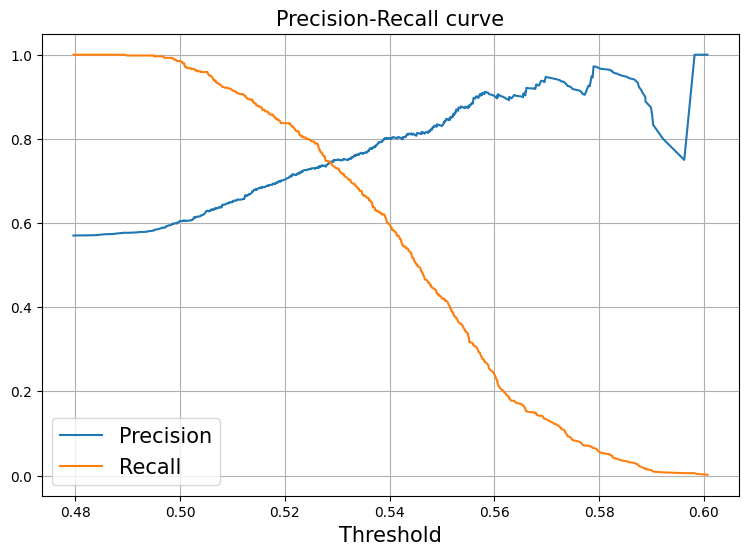

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

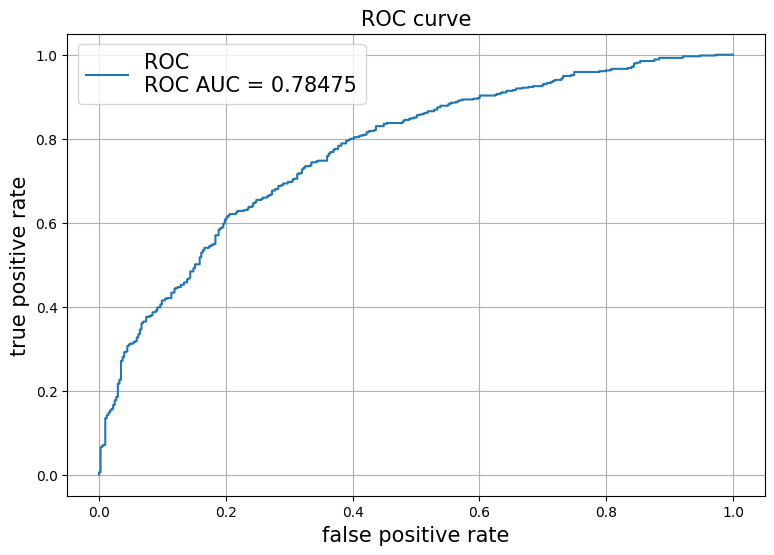

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc, 5)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)